In [1]:
import scanpy as sc

In [2]:
import pandas as pd
import numpy as np

In [3]:
DATA_DIR = '/path_to_data/'

# inspect adata

In [4]:
adata_path = DATA_DIR+ 'TIL-X-NSCLC-X-Caushi-X-scRNAseq-X-2021-X-10.1038_s41586-021-03752-4.h5ad'
adata_save_path = DATA_DIR+ 'TIL-X-NSCLC-X-Caushi-X-scRNAseq-X-2021-X-10.1038_s41586-021-03752-4_annotated.h5ad'
csv_save_path = DATA_DIR+ 'TIL-X-NSCLC-X-Caushi-X-scRNAseq-X-2021-X-10.1038_s41586-021-03752-4.csv'
csv_patient_save_path = DATA_DIR+ 'TIL-X-NSCLC-X-Caushi-X-scRNAseq-X-2021-X-10.1038_s41586-021-03752-4-X-patient_metadata.csv'
csv_sample_save_path = DATA_DIR+ 'TIL-X-NSCLC-X-Caushi-X-scRNAseq-X-2021-X-10.1038_s41586-021-03752-4-X-sample_metadata.csv'

adata_antigen_path = DATA_DIR + 'TIL-X-NSCLC-X-Caushi-X-scRNAseq-X-2021-X-10.1038_s41586-021-03752-4_ser_antigen_tumor.h5ad'

In [5]:
adata_antigen = sc.read(adata_antigen_path)
adata_antigen

AnnData object with n_obs × n_vars = 1432 × 26058
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'barcode', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'sample', 'files', 'patient_id', 'tissue', 'batch', 'chip', 'lane', 'time', 'sample_number', 'multilane.tn', 'multilane', 'mana.include', 'pp3.mana', 'is2.mana', 'jm6.mana', 'center', 'cohort', 'response', 'relapse', 'patno', 'patient', 'imid.x', 'geid', 'chemo', 'pfs', 'recurrence_n', 'radio_change', 'resi_tumor', 'mpr', 'age', 'sex', 'smoke', 'pack_year', 'hist', 'death', 'date_death', 'clinical_recurrence', 'biopsy_recurrence', 'recurrence', 'date_recurrence', 'path_resec', 'pre_stage', 'pre_stage_com', 'ae', 'grade', 'recist', 'path_down', 'pre_pd.', 'post_pd.', 'mutation', 'number_seq_alteration', 'non_redundant_neoantigens_5000', 'non_redundant_neoantigens_500', 'sample.n', 'integrated_snn_res.0.7', 'seurat_clusters', 'integrated_snn_res.0.3', 'integrated_snn_res.0.5', 'integrated_snn_res.0.6'

In [6]:
import cytopus as cp

In [7]:
G = cp.kb.KnowledgeBase()

KnowledgeBase object containing 75 cell types and 201 cellular processes



In [8]:
adata_antigen.obs['antigen'].value_counts()

MANA          890
InfluenzaA    275
EBV           267
Name: antigen, dtype: int64

In [5]:
adata = sc.read(adata_path)
adata

AnnData object with n_obs × n_vars = 560916 × 22223
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'barcode', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'sample', 'files', 'patient_id', 'tissue', 'batch', 'chip', 'lane', 'time', 'sample_number', 'multilane.tn', 'multilane', 'mana.include', 'pp3.mana', 'is2.mana', 'jm6.mana', 'center', 'cohort', 'response', 'relapse', 'patno', 'patient', 'imid', 'geid', 'chemo', 'pfs', 'recurrence_n', 'radio_change', 'resi_tumor', 'mpr', 'age', 'sex', 'smoke', 'pack_year', 'hist', 'death', 'date_death', 'clinical_recurrence', 'biopsy_recurrence', 'recurrence', 'date_recurrence', 'path_resec', 'pre_stage', 'pre_stage_com', 'ae', 'grade', 'recist', 'path_down', 'pre_pd.', 'post_pd.', 'mutation', 'number_seq_alteration', 'non_redundant_neoantigens_5000', 'non_redundant_neoantigens_500', 'sample.n', 'integrated_snn_res.0.7', 'seurat_clusters', 'integrated_snn_res.0.3', 'integrated_snn_res.0.6', 'integrated_snn_res.0.5'

In [10]:
#adjust adata for plotting
adata.raw.var.set_index('_index',inplace=True)
adata.obs['seurat_clusters'] = pd.Categorical(adata.obs['seurat_clusters'].astype(str))

In [15]:
#add MANAFEST info
antigen_list = []
MANAFEST_dict = adata_antigen.obs['antigen'].to_dict()
for i in adata.obs_names:
    if i in adata_antigen.obs_names:
        antigen_list.append(MANAFEST_dict[i])
    else:
        antigen_list.append(np.nan)
adata.obs['antigen'] = antigen_list
set(adata.obs['antigen'])

{'EBV', 'InfluenzaA', 'MANA', nan}

In [ ]:
metadata_variables = ['antigen',]

In [158]:
#patient metadata

variables = ['age','sex','pre_stage','mutation','center','smoke','pack_year','mpr','pfs','chemo','death',
             'recurrence_n','patient_id'
            ]

patient_data = adata.obs[variables]
patient_data = patient_data[~(patient_data==-2147483648).any(axis=1)]
patient_metadata = pd.DataFrame()

for j in set(adata.obs['patient_id']):
    patient_data_subset =patient_data[patient_data['patient_id']==j]
    variable_list = []
    for i in variables:
        var = set(patient_data_subset[i])
        if len(var) >1:
            print('variable',i,'contains more than one value for patient',j)
        variable_list.append(list(var)[0])
    patient_metadata.loc[j,variables]= variable_list
    

In [160]:
ID_mapping_dict = {#for privacy reasons the mapping is not disclosed publicly 
    
}

In [ ]:
patient_metadata.index = patient_metadata.index.map(ID_mapping_dict)
patient_metadata

In [ ]:
adata.obs['patient_ID'] =  adata.obs['patient_id'].map(ID_mapping_dict)
set(adata.obs['patient_ID'])

## sample metadata

In [135]:
adata

AnnData object with n_obs × n_vars = 560916 × 22223
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'barcode', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'sample', 'files', 'patient_id', 'tissue', 'batch', 'chip', 'lane', 'time', 'sample_number', 'multilane.tn', 'multilane', 'mana.include', 'pp3.mana', 'is2.mana', 'jm6.mana', 'center', 'cohort', 'response', 'relapse', 'patno', 'patient', 'imid', 'geid', 'chemo', 'pfs', 'recurrence_n', 'radio_change', 'resi_tumor', 'mpr', 'age', 'sex', 'smoke', 'pack_year', 'hist', 'death', 'date_death', 'clinical_recurrence', 'biopsy_recurrence', 'recurrence', 'date_recurrence', 'path_resec', 'pre_stage', 'pre_stage_com', 'ae', 'grade', 'recist', 'path_down', 'pre_pd.', 'post_pd.', 'mutation', 'number_seq_alteration', 'non_redundant_neoantigens_5000', 'non_redundant_neoantigens_500', 'sample.n', 'integrated_snn_res.0.7', 'seurat_clusters', 'integrated_snn_res.0.3', 'integrated_snn_res.0.6', 'integrated_snn_res.0.5'

In [166]:
tissue_dict = {'LN':'tumor-adjacentLN', 'mettumor':'tumor-metastasis', 'normal':'normal-adjacent', 'tumor':'tumor-lung'}
adata.obs['tissue_adjusted'] = adata.obs['tissue'].map(tissue_dict)
set(adata.obs['tissue_adjusted'])

{'normal-adjacent', 'tumor-adjacentLN', 'tumor-lung', 'tumor-metastasis'}

In [ ]:
adata.obs['sample_ID'] = adata.obs['tissue_adjusted'].str.cat(adata.obs['patient_ID'],sep='_')
set(adata.obs['sample_ID'])

In [170]:
#sample metadata

variables = ['patient_ID','tissue','sample_ID'
            ]

patient_data = adata.obs[variables]
patient_data = patient_data[~(patient_data==-2147483648).any(axis=1)] #NaNs encoded as -2147483648
patient_metadata = pd.DataFrame()

for j in set(adata.obs['sample_ID']):
    patient_data_subset =patient_data[patient_data['sample_ID']==j]
    variable_list = []
    for i in variables:
        var = set(patient_data_subset[i])
        if len(var) >1:
            print('variable',i,'contains more than one value for sample',j)
        variable_list.append(list(var)[0])
    patient_metadata.loc[j,variables]= variable_list
    

In [ ]:
patient_metadata.to_csv(csv_sample_save_path)
print('saved sample data to:',csv_sample_save_path)

# check cell type labels

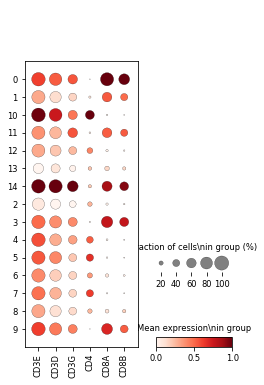

In [174]:

gene_list = ['CD3E','CD3D','CD3G','CD4','CD8A','CD8B']
gene_list_clean = [x for x in gene_list if x in adata.var_names]
sc.pl.dotplot(adata, gene_list_clean,'seurat_clusters', use_raw=None, log=False, num_categories=7, expression_cutoff=0.0, 
           mean_only_expressed=False, cmap='Reds', dot_max=None, dot_min=None, standard_scale='var', 
           smallest_dot=0.0, title=None, colorbar_title='Mean expression\\nin group', 
           size_title='Fraction of cells\\nin group (%)', figsize=None, dendrogram=False, gene_symbols=None, 
           var_group_positions=None, var_group_labels=None, var_group_rotation=None, layer=None, swap_axes=False, 
           dot_color_df=None, show=None, save='Caushi_seurat_clusters_typing.svg', ax=None, return_fig=False, vmin=None, vmax=None, vcenter=None, norm=None)

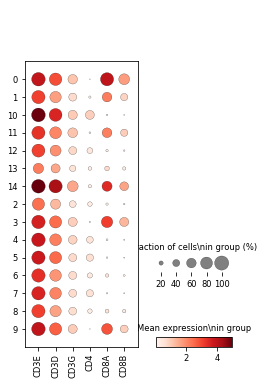

In [175]:
gene_list = ['CD3E','CD3D','CD3G','CD4','CD8A','CD8B']
gene_list_clean = [x for x in gene_list if x in adata.var_names]
sc.pl.dotplot(adata, gene_list_clean,'seurat_clusters', use_raw=None, log=False, num_categories=7, expression_cutoff=0.0, 
           mean_only_expressed=False, cmap='Reds', dot_max=None, dot_min=None, standard_scale=None, 
           smallest_dot=0.0, title=None, colorbar_title='Mean expression\\nin group', 
           size_title='Fraction of cells\\nin group (%)', figsize=None, dendrogram=False, gene_symbols=None, 
           var_group_positions=None, var_group_labels=None, var_group_rotation=None, layer=None, swap_axes=False, 
           dot_color_df=None, show=None, save='Caushi_seurat_clusters_typing.svg', ax=None, return_fig=False, vmin=None, vmax=None, vcenter=None, norm=None)

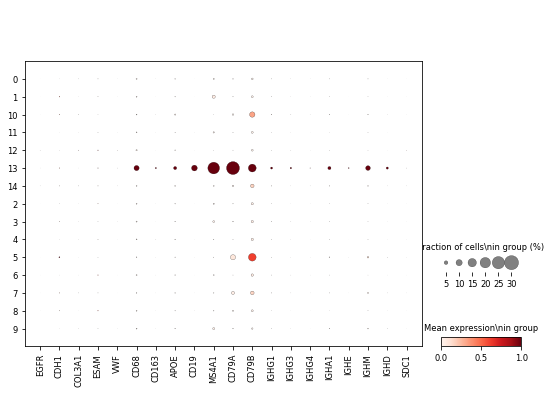

In [176]:
gene_list = ['EGFR','CDH1','EPCAM','COL1A1','COL3A1','VIM','ESAM',
 'VWF','CD68','CD163','APOE','CD19','MS4A1','CD79A','CD79B','IGHG1','IGHG2A','IGHG3','IGHG4','IGHA1','IGHE','IGHM','IGHD','SDC1']
gene_list_clean = [x for x in gene_list if x in adata.var_names]
sc.pl.dotplot(adata, gene_list_clean,'seurat_clusters', use_raw=None, log=False, num_categories=7, expression_cutoff=0.0, 
           mean_only_expressed=False, cmap='Reds', dot_max=None, dot_min=None, standard_scale='var', 
           smallest_dot=0.0, title=None, colorbar_title='Mean expression\\nin group', 
           size_title='Fraction of cells\\nin group (%)', figsize=None, dendrogram=False, gene_symbols=None, 
           var_group_positions=None, var_group_labels=None, var_group_rotation=None, layer=None, swap_axes=False, 
           dot_color_df=None, show=None, save='Caushi_seurat_clusters_typing.svg', ax=None, return_fig=False, vmin=None, vmax=None, vcenter=None, norm=None)

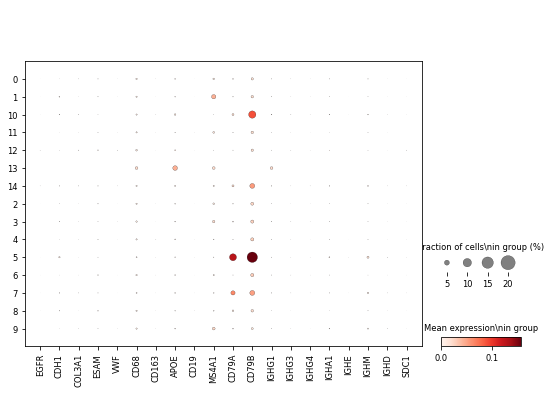

In [192]:
gene_list = ['EGFR','CDH1','EPCAM','COL1A1','COL3A1','VIM','ESAM',
 'VWF','CD68','CD163','APOE','CD19','MS4A1','CD79A','CD79B','IGHG1','IGHG2A','IGHG3','IGHG4','IGHA1','IGHE','IGHM','IGHD','SDC1']
gene_list_clean = [x for x in gene_list if x in adata.var_names]
sc.pl.dotplot(adata, gene_list_clean,'seurat_clusters', use_raw=None, log=False, num_categories=7, expression_cutoff=0.0, 
           mean_only_expressed=False, cmap='Reds', dot_max=None, dot_min=None, standard_scale=None, 
           smallest_dot=0.0, title=None, colorbar_title='Mean expression\\nin group', 
           size_title='Fraction of cells\\nin group (%)', figsize=None, dendrogram=False, gene_symbols=None, 
           var_group_positions=None, var_group_labels=None, var_group_rotation=None, layer=None, swap_axes=False, 
           dot_color_df=None, show=None, save='Caushi_seurat_clusters_typing.svg', ax=None, return_fig=False, vmin=None, vmax=None, vcenter=None, norm=None)

In [178]:
#exclude cluster 13 except for cells with antigen specific TCRs(--> B lineage or doublet)

adata_subset = adata[adata.obs['seurat_clusters']=='13'] 

obs_keep= []
for i in adata.obs_names:
    if i in adata_subset.obs_names:
        if i in adata_antigen.obs_names:
            obs_keep.append(i)
    else:
        obs_keep.append(i)
adata = adata[adata.obs_names.isin(obs_keep)]
adata

View of AnnData object with n_obs × n_vars = 556289 × 22223
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'barcode', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'sample', 'files', 'patient_id', 'tissue', 'batch', 'chip', 'lane', 'time', 'sample_number', 'multilane.tn', 'multilane', 'mana.include', 'pp3.mana', 'is2.mana', 'jm6.mana', 'center', 'cohort', 'response', 'relapse', 'patno', 'patient', 'imid', 'geid', 'chemo', 'pfs', 'recurrence_n', 'radio_change', 'resi_tumor', 'mpr', 'age', 'sex', 'smoke', 'pack_year', 'hist', 'death', 'date_death', 'clinical_recurrence', 'biopsy_recurrence', 'recurrence', 'date_recurrence', 'path_resec', 'pre_stage', 'pre_stage_com', 'ae', 'grade', 'recist', 'path_down', 'pre_pd.', 'post_pd.', 'mutation', 'number_seq_alteration', 'non_redundant_neoantigens_5000', 'non_redundant_neoantigens_500', 'sample.n', 'integrated_snn_res.0.7', 'seurat_clusters', 'integrated_snn_res.0.3', 'integrated_snn_res.0.6', 'integrated_snn_

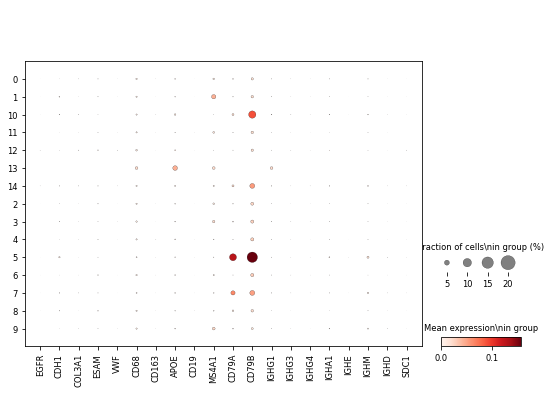

In [179]:
gene_list = ['EGFR','CDH1','EPCAM','COL1A1','COL3A1','VIM','ESAM',
 'VWF','CD68','CD163','APOE','CD19','MS4A1','CD79A','CD79B','IGHG1','IGHG2A','IGHG3','IGHG4','IGHA1','IGHE','IGHM','IGHD','SDC1']
gene_list_clean = [x for x in gene_list if x in adata.var_names]
sc.pl.dotplot(adata, gene_list_clean,'seurat_clusters', use_raw=None, log=False, num_categories=7, expression_cutoff=0.0, 
           mean_only_expressed=False, cmap='Reds', dot_max=None, dot_min=None, standard_scale=None, 
           smallest_dot=0.0, title=None, colorbar_title='Mean expression\\nin group', 
           size_title='Fraction of cells\\nin group (%)', figsize=None, dendrogram=False, gene_symbols=None, 
           var_group_positions=None, var_group_labels=None, var_group_rotation=None, layer=None, swap_axes=False, 
           dot_color_df=None, show=None, save='Caushi_seurat_clusters_typing.svg', ax=None, return_fig=False, vmin=None, vmax=None, vcenter=None, norm=None)

In [182]:
#antigen in each cluster
antigen_cluster_df = pd.DataFrame()
for i in set(adata.obs['seurat_clusters']):
    adata_subset = adata[adata.obs['seurat_clusters']==i]
    for j,k in adata_subset.obs['antigen'].value_counts().items():
        antigen_cluster_df.loc[i,j] = k/len(adata_subset)
antigen_cluster_df

,EBV,MANA,InfluenzaA
1,0.000923,0.000295,0.000013
13,0.068182,0.931818,NaN
3,0.002830,0.002039,0.000018
5,NaN,NaN,0.000021
6,NaN,0.000190,0.001002
10,NaN,0.000063,NaN
4,NaN,0.002136,0.000038
11,0.000793,0.000440,NaN
14,0.003659,0.007724,NaN
2,0.000039,0.000196,0.000013


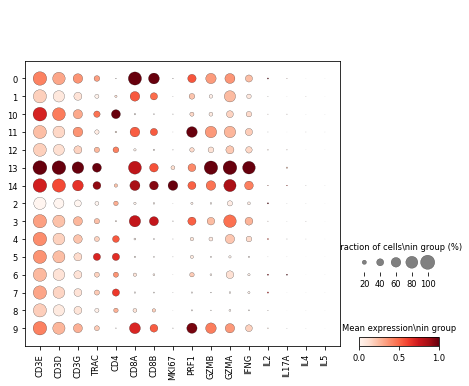

In [184]:
gene_list = ['CD3E','CD3D','CD3G','TRAC','TRBC1','TRBC2','TRDC','TRGC1','TRGC2','CD4','CD8A','CD8B','MKI67',
            'PRF1','GZMB','GZMA','IFNG','IL2','IL17A','IL4','IL5']
gene_list_clean = [x for x in gene_list if x in adata.var_names]
sc.pl.dotplot(adata, gene_list_clean,'seurat_clusters', use_raw=None, log=False, num_categories=7, expression_cutoff=0.0, 
           mean_only_expressed=False, cmap='Reds', dot_max=None, dot_min=None, standard_scale='var', 
           smallest_dot=0.0, title=None, colorbar_title='Mean expression\\nin group', 
           size_title='Fraction of cells\\nin group (%)', figsize=None, dendrogram=False, gene_symbols=None, 
           var_group_positions=None, var_group_labels=None, var_group_rotation=None, layer=None, swap_axes=False, 
           dot_color_df=None, show=None, save='Caushi_seurat_clusters_typing.svg', ax=None, return_fig=False, vmin=None, vmax=None, vcenter=None, norm=None)

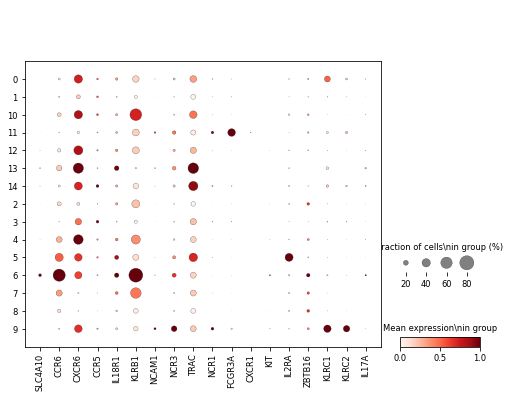

In [185]:
gene_list = ['SLC4A10','IL4L1','CCR6','CXCR6','CCR5','IL18R1','KLRB1','TCRAV7S1','NCAM1','NCR3','TRAC','TRBC1','TRBC2','TRDC','TRGC1','TRGC2','CD56','NCR1',
            'FCGR3A','CXCR1','KIT','IL2RA','ZBTB16','KLRC1','KLRC2','IL17A']
gene_list_clean = [x for x in gene_list if x in adata.var_names]
sc.pl.dotplot(adata, gene_list_clean,'seurat_clusters', use_raw=None, log=False, num_categories=7, expression_cutoff=0.0, 
           mean_only_expressed=False, cmap='Reds', dot_max=None, dot_min=None, standard_scale='var', 
           smallest_dot=0.0, title=None, colorbar_title='Mean expression\\nin group', 
           size_title='Fraction of cells\\nin group (%)', figsize=None, dendrogram=False, gene_symbols=None, 
           var_group_positions=None, var_group_labels=None, var_group_rotation=None, layer=None, swap_axes=False, 
           dot_color_df=None, show=None, save='Caushi_seurat_clusters_typing.svg', ax=None, return_fig=False, vmin=None, vmax=None, vcenter=None, norm=None)

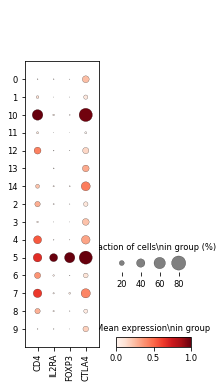

In [186]:
gene_list = ['CD4','IL2RA','FOXP3','CTLA4']
gene_list_clean = [x for x in gene_list if x in adata.var_names]
sc.pl.dotplot(adata, gene_list_clean,'seurat_clusters', use_raw=None, log=False, num_categories=7, expression_cutoff=0.0, 
           mean_only_expressed=False, cmap='Reds', dot_max=None, dot_min=None, standard_scale='var', 
           smallest_dot=0.0, title=None, colorbar_title='Mean expression\\nin group', 
           size_title='Fraction of cells\\nin group (%)', figsize=None, dendrogram=False, gene_symbols=None, 
           var_group_positions=None, var_group_labels=None, var_group_rotation=None, layer=None, swap_axes=False, 
           dot_color_df=None, show=None, save='Caushi_seurat_clusters_typing.svg', ax=None, return_fig=False, vmin=None, vmax=None, vcenter=None, norm=None)

In [190]:
#label cells
label_dict = {'0':'CD8-T',
             '1':'CD8-T',
             '2':'CD4-T',
             '3':'CD8-T',
             '4':'CD4-T',
             '5':'Treg',
             '6':'MAIT',
             '7':'CD4-T',
             '8':'CD4-T',
             '9':'CD8-T',
             '10':'CD4-T',
             '11':'CD8-T',
             '12':'CD4-T',
             '13':'CD8-T',
             '14':'CD8-T'}

In [ ]:
#label
adata.obs['annotation'] = adata.obs['seurat_clusters'].map(label_dict)
set(adata.obs['annotation'])

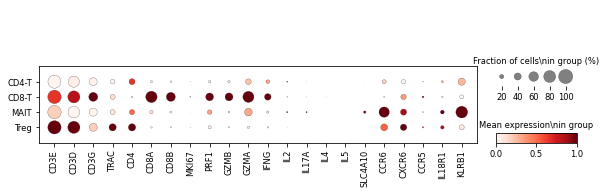

In [195]:
gene_list = ['CD3E','CD3D','CD3G','TRAC','TRBC1','TRBC2','TRDC','TRGC1','TRGC2','CD4','CD8A','CD8B','MKI67',
            'PRF1','GZMB','GZMA','IFNG','IL2','IL17A','IL4','IL5','SLC4A10','IL4L1','CCR6','CXCR6','CCR5','IL18R1','KLRB1',]
gene_list_clean = [x for x in gene_list if x in adata.var_names]
sc.pl.dotplot(adata, gene_list_clean,'annotation', use_raw=None, log=False, num_categories=7, expression_cutoff=0.0, 
           mean_only_expressed=False, cmap='Reds', dot_max=None, dot_min=None, standard_scale='var', 
           smallest_dot=0.0, title=None, colorbar_title='Mean expression\\nin group', 
           size_title='Fraction of cells\\nin group (%)', figsize=None, dendrogram=False, gene_symbols=None, 
           var_group_positions=None, var_group_labels=None, var_group_rotation=None, layer=None, swap_axes=False, 
           dot_color_df=None, show=None, save='Caushi_seurat_clusters_typing.svg', ax=None, return_fig=False, vmin=None, vmax=None, vcenter=None, norm=None)

# normalize to med libsize and log1p

In [197]:
print(adata.raw.X)

  (0, 17)	1.0
  (0, 30)	1.0
  (0, 48)	1.0
  (0, 75)	2.0
  (0, 76)	1.0
  (0, 93)	1.0
  (0, 116)	1.0
  (0, 127)	2.0
  (0, 147)	2.0
  (0, 184)	1.0
  (0, 253)	1.0
  (0, 289)	1.0
  (0, 300)	1.0
  (0, 316)	1.0
  (0, 355)	1.0
  (0, 357)	1.0
  (0, 364)	1.0
  (0, 375)	1.0
  (0, 379)	3.0
  (0, 381)	5.0
  (0, 383)	3.0
  (0, 386)	2.0
  (0, 422)	2.0
  (0, 428)	1.0
  (0, 433)	1.0
  :	:
  (556288, 20666)	1.0
  (556288, 20720)	1.0
  (556288, 20738)	1.0
  (556288, 20774)	1.0
  (556288, 20940)	1.0
  (556288, 21104)	1.0
  (556288, 21135)	1.0
  (556288, 21194)	1.0
  (556288, 21368)	1.0
  (556288, 21504)	1.0
  (556288, 21616)	1.0
  (556288, 21672)	1.0
  (556288, 21681)	1.0
  (556288, 21700)	1.0
  (556288, 21724)	1.0
  (556288, 21735)	1.0
  (556288, 21762)	1.0
  (556288, 21776)	1.0
  (556288, 21795)	1.0
  (556288, 21875)	1.0
  (556288, 21970)	1.0
  (556288, 22040)	1.0
  (556288, 22048)	1.0
  (556288, 22056)	1.0
  (556288, 22176)	1.0


In [198]:
print(adata.X)

  (0, 17)	1.7489108
  (0, 30)	1.7489108
  (0, 48)	1.7489108
  (0, 75)	2.3510587
  (0, 76)	1.7489108
  (0, 93)	1.7489108
  (0, 116)	1.7489108
  (0, 127)	2.3510587
  (0, 147)	2.3510587
  (0, 184)	1.7489108
  (0, 253)	1.7489108
  (0, 289)	1.7489108
  (0, 300)	1.7489108
  (0, 316)	1.7489108
  (0, 355)	1.7489108
  (0, 357)	1.7489108
  (0, 364)	1.7489108
  (0, 375)	1.7489108
  (0, 379)	2.7242525
  (0, 381)	3.2084897
  (0, 383)	2.7242525
  (0, 386)	2.3510587
  (0, 422)	2.3510587
  (0, 428)	1.7489108
  (0, 433)	1.7489108
  :	:
  (556288, 20666)	3.0794706
  (556288, 20720)	3.0794706
  (556288, 20738)	3.0794706
  (556288, 20774)	3.0794706
  (556288, 20940)	3.0794706
  (556288, 21104)	3.0794706
  (556288, 21135)	3.0794706
  (556288, 21194)	3.0794706
  (556288, 21368)	3.0794706
  (556288, 21504)	3.0794706
  (556288, 21616)	3.0794706
  (556288, 21672)	3.0794706
  (556288, 21681)	3.0794706
  (556288, 21700)	3.0794706
  (556288, 21724)	3.0794706
  (556288, 21735)	3.0794706
  (556288, 21762)	3.0794706

In [199]:
adata.X = adata.raw[adata.obs_names, adata.var_names].X

In [200]:
print(adata.X)

  (0, 17)	1.0
  (0, 30)	1.0
  (0, 48)	1.0
  (0, 75)	2.0
  (0, 76)	1.0
  (0, 93)	1.0
  (0, 116)	1.0
  (0, 127)	2.0
  (0, 147)	2.0
  (0, 184)	1.0
  (0, 253)	1.0
  (0, 289)	1.0
  (0, 300)	1.0
  (0, 316)	1.0
  (0, 355)	1.0
  (0, 357)	1.0
  (0, 364)	1.0
  (0, 375)	1.0
  (0, 379)	3.0
  (0, 381)	5.0
  (0, 383)	3.0
  (0, 386)	2.0
  (0, 422)	2.0
  (0, 428)	1.0
  (0, 433)	1.0
  :	:
  (556288, 20666)	1.0
  (556288, 20720)	1.0
  (556288, 20738)	1.0
  (556288, 20774)	1.0
  (556288, 20940)	1.0
  (556288, 21104)	1.0
  (556288, 21135)	1.0
  (556288, 21194)	1.0
  (556288, 21368)	1.0
  (556288, 21504)	1.0
  (556288, 21616)	1.0
  (556288, 21672)	1.0
  (556288, 21681)	1.0
  (556288, 21700)	1.0
  (556288, 21724)	1.0
  (556288, 21735)	1.0
  (556288, 21762)	1.0
  (556288, 21776)	1.0
  (556288, 21795)	1.0
  (556288, 21875)	1.0
  (556288, 21970)	1.0
  (556288, 22040)	1.0
  (556288, 22048)	1.0
  (556288, 22056)	1.0
  (556288, 22176)	1.0


In [201]:
#total count normalization
sc.pp.normalize_total(adata, target_sum=None)
#logarithmize +1 the data
sc.pp.log1p(adata)

In [202]:
print(adata.X)

  (0, 17)	0.5780315244525334
  (0, 30)	0.5780315244525334
  (0, 48)	0.5780315244525334
  (0, 75)	0.9419788416586401
  (0, 76)	0.5780315244525334
  (0, 93)	0.5780315244525334
  (0, 116)	0.5780315244525334
  (0, 127)	0.9419788416586401
  (0, 147)	0.9419788416586401
  (0, 184)	0.5780315244525334
  (0, 253)	0.5780315244525334
  (0, 289)	0.5780315244525334
  (0, 300)	0.5780315244525334
  (0, 316)	0.5780315244525334
  (0, 355)	0.5780315244525334
  (0, 357)	0.5780315244525334
  (0, 364)	0.5780315244525334
  (0, 375)	0.5780315244525334
  (0, 379)	1.2082372031123936
  (0, 381)	1.5918095578695395
  (0, 383)	1.2082372031123936
  (0, 386)	0.9419788416586401
  (0, 422)	0.9419788416586401
  (0, 428)	0.5780315244525334
  (0, 433)	0.5780315244525334
  :	:
  (556288, 20666)	1.4859331446528705
  (556288, 20720)	1.4859331446528705
  (556288, 20738)	1.4859331446528705
  (556288, 20774)	1.4859331446528705
  (556288, 20940)	1.4859331446528705
  (556288, 21104)	1.4859331446528705
  (556288, 21135)	1.48593314

## get highly variable genes

In [203]:
sc.pp.highly_variable_genes(adata, n_top_genes = 3000, flavor = "cell_ranger")

In [204]:
adata

AnnData object with n_obs × n_vars = 556289 × 22223
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'barcode', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'sample', 'files', 'patient_id', 'tissue', 'batch', 'chip', 'lane', 'time', 'sample_number', 'multilane.tn', 'multilane', 'mana.include', 'pp3.mana', 'is2.mana', 'jm6.mana', 'center', 'cohort', 'response', 'relapse', 'patno', 'patient', 'imid', 'geid', 'chemo', 'pfs', 'recurrence_n', 'radio_change', 'resi_tumor', 'mpr', 'age', 'sex', 'smoke', 'pack_year', 'hist', 'death', 'date_death', 'clinical_recurrence', 'biopsy_recurrence', 'recurrence', 'date_recurrence', 'path_resec', 'pre_stage', 'pre_stage_com', 'ae', 'grade', 'recist', 'path_down', 'pre_pd.', 'post_pd.', 'mutation', 'number_seq_alteration', 'non_redundant_neoantigens_5000', 'non_redundant_neoantigens_500', 'sample.n', 'integrated_snn_res.0.7', 'seurat_clusters', 'integrated_snn_res.0.3', 'integrated_snn_res.0.6', 'integrated_snn_res.0.5'

In [ ]:
adata.write(adata_save_path)
print('saved data to:',adata_save_path)

# prepare gene set dictionary for Spectra

all celltypes in knowledge base: ['gran', 'baso', 'Treg', 'Langerhans', 'FDC', 'GC-B', 'all-cells', 'mo-DC', 'B-memory-switched', 'B-memory-IgM-MZ', 'ILC2', 'mast', 'cDC1', 'neutro', 'M', 'CD8-T_KLRG1pos-effector', 'cDC2', 'endo-aerocyte', 'MDC', 'B-memory-non-switched', 'NSCLC-carcinoma-cell', 'TRM', 'B', 'NK-adaptive', 'B-memory-DN', 'Lti', 'fibro', 'ILC', 'epi', 'ILC3', 'eosino', 'CD56bright-NK', 'B-memory', 'CD4-T', 'TNK', 'carcinoma-cell', 'ILC3-NCRpos', 'TSCM', 'leukocyte', 'T-naive', 'plasma-blast', 'plasma', 'B-naive', 'ILC1', 'lung-endo-venous', 'crc-carcinoma-cell', 'lung-smooth-muscle', 'TFH', 'colon-epi', 'ILC3-NCRneg', 'TCM', 'gdT', 'endo-lymphatic', 'TEM', 'Mac', 'endo', 'B-pb-mature', 'cDC', 'B-pb-t2', 'CD8-T', 'CD8-T_KLRG1neg-effector', 'endo-systemic-venous', 'B-pb-t1', 'mono', 'NK', 'T', 'CD8-T-progenitor-exhausted', 'smooth-muscle', 'cDC3', 'capillary', 'endo-arterial', 'lung-epi', 'p-DC', 'CD56dim-NK', 'DC']


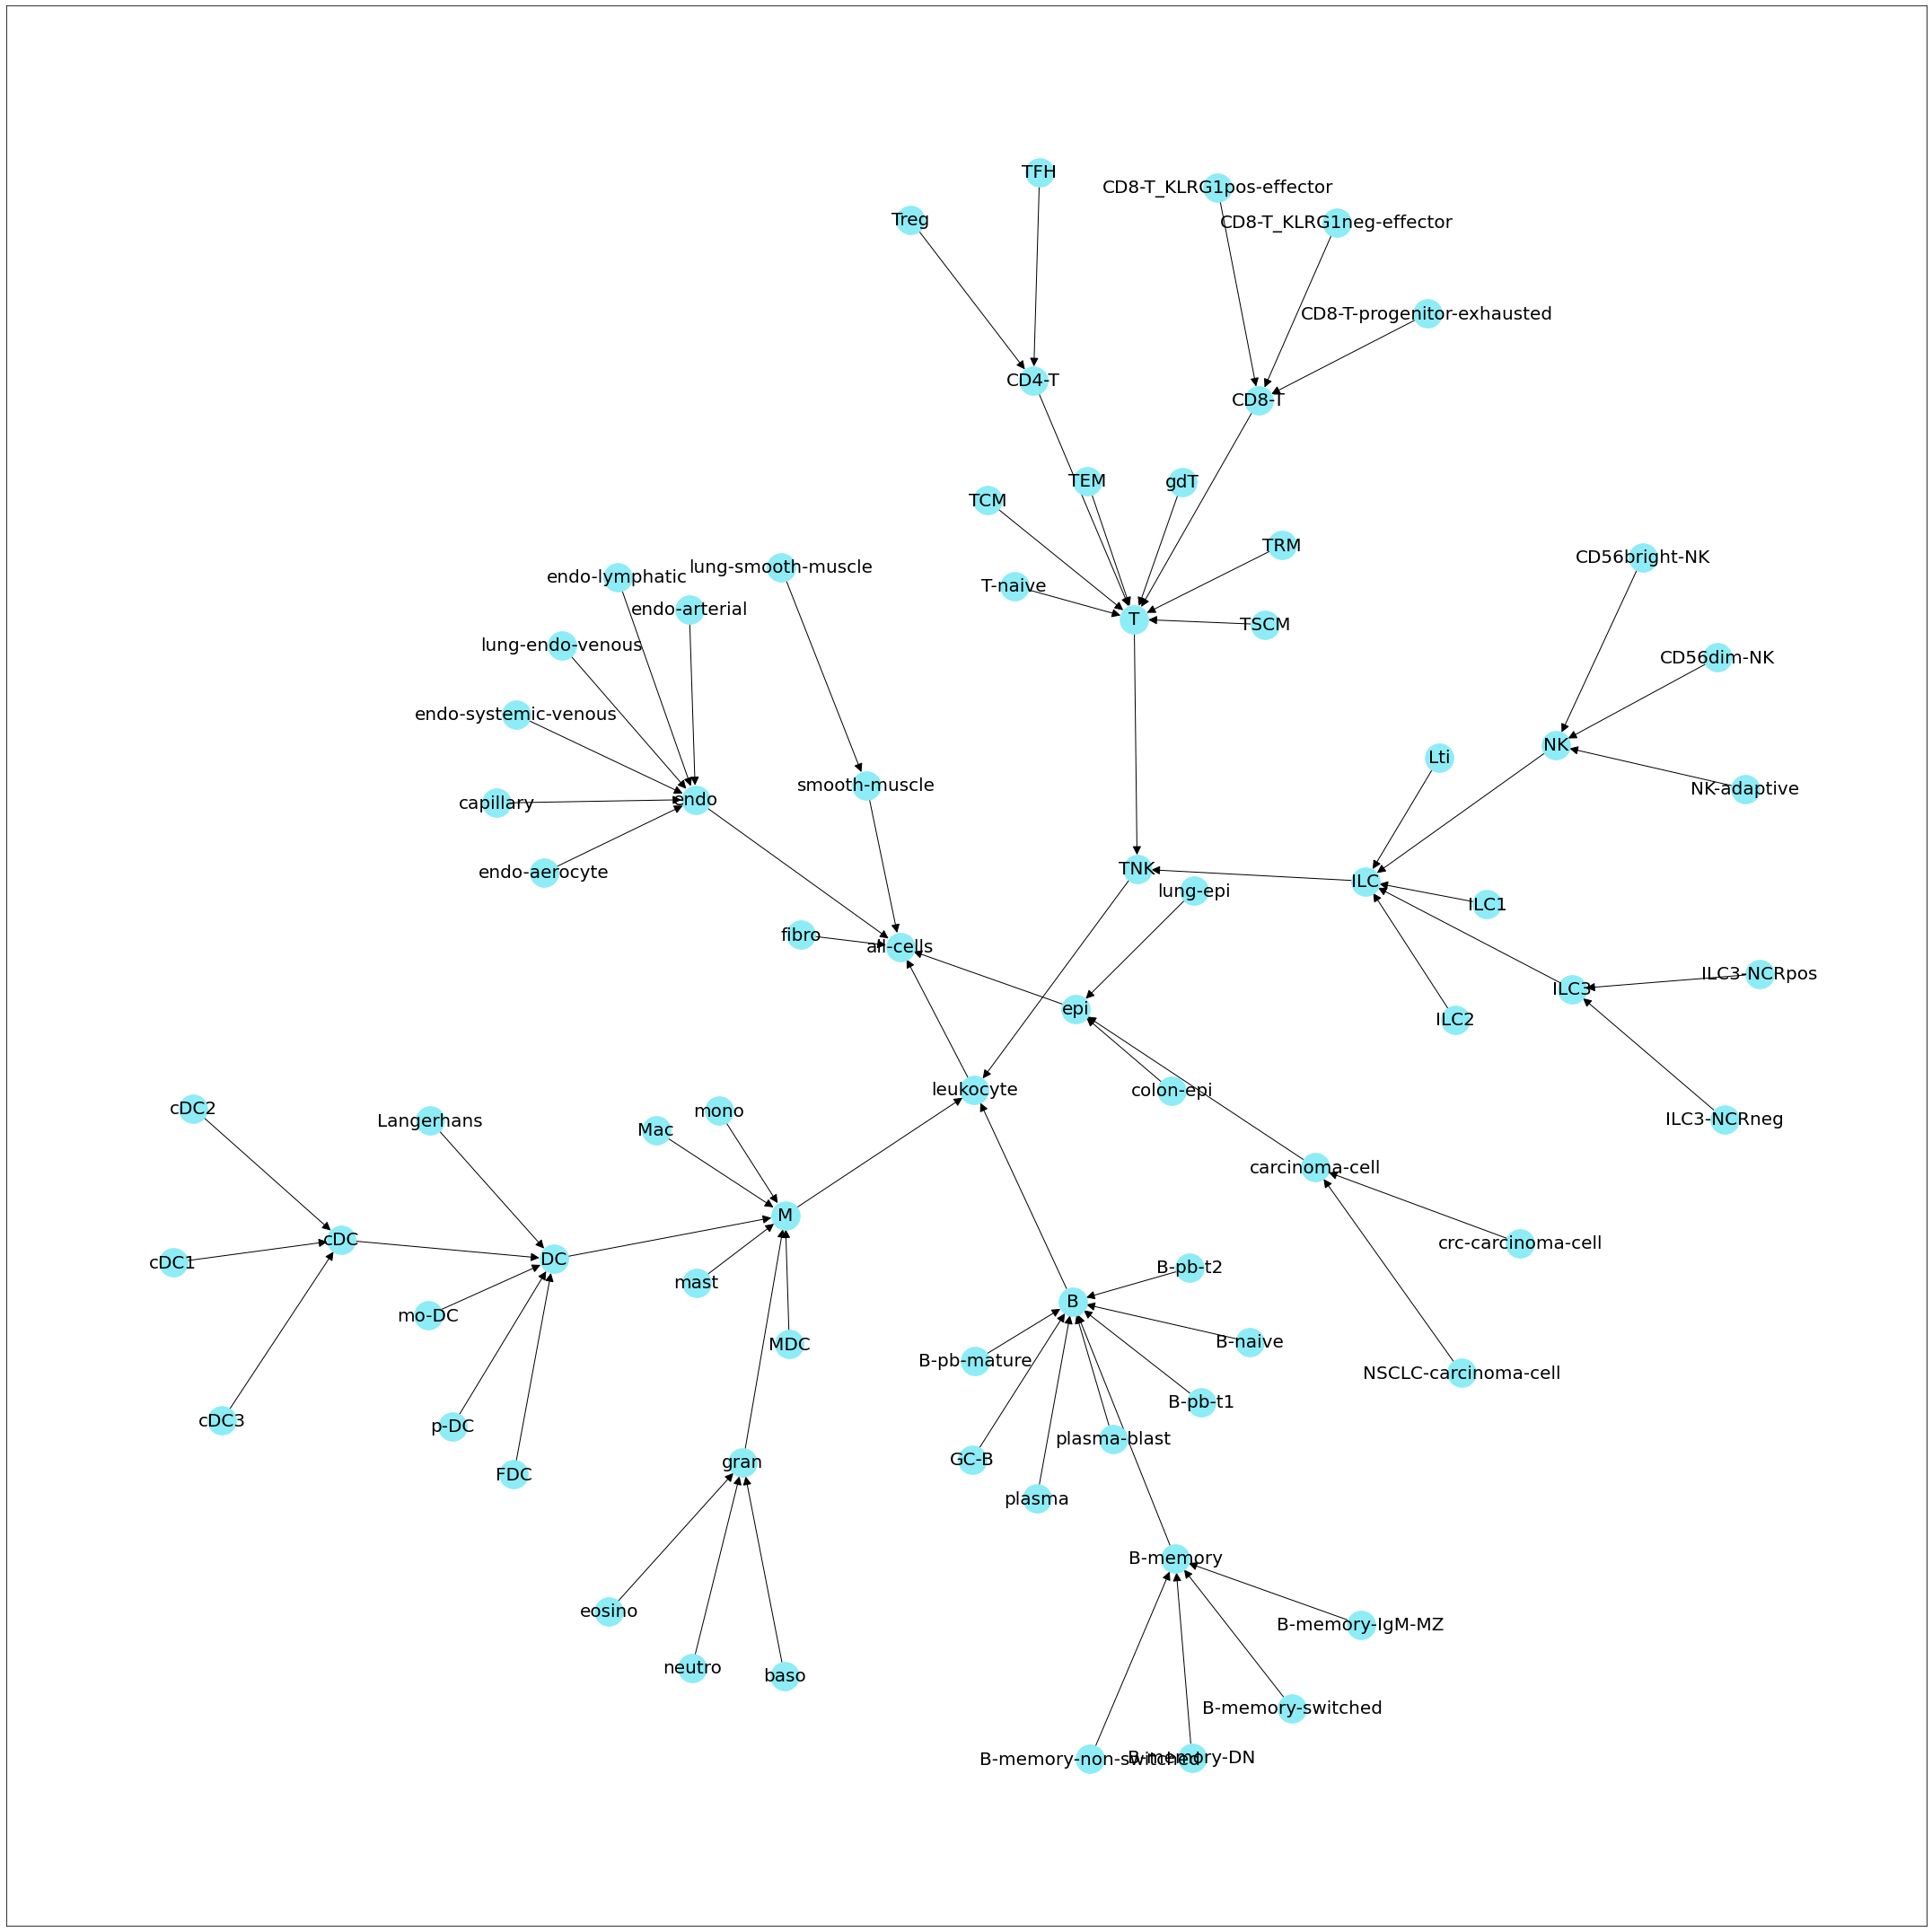

In [208]:
G.plot_celltypes()

In [226]:
#define cell types to retrieve gene sets for
celltype_of_interest = [
 'CD4-T',
 'CD8-T',
'Treg']
global_celltypes = ['all-cells','leukocyte','TNK','T']

query_depth_parent = {'CD4-T':None,'CD8-T':None,'Treg':None} 
query_depth_child = {'CD4-T':None,'CD8-T':1,'Treg':None} 

#retrieve dictionary for Spectra
G.get_celltype_processes(celltype_of_interest,global_celltypes = global_celltypes,get_children=True,get_parents=True,
                         child_depth=1,parent_depth=1,
                         parent_depth_dict = query_depth_parent,
                        child_depth_dict = query_depth_child
                        )

In [227]:
G.celltype_process_dict.keys()

dict_keys(['CD4-T', 'CD8-T', 'Treg', 'global'])

In [228]:
G.celltype_process_dict['global'].keys()

dict_keys(['all_carnitine-shuttle', 'all_autophagy_regulation_positive', 'all_SASP', 'all_fatty-acid-beta-oxidation-mitochondrial', 'all_PI3K-AKT-mTOR_signaling', 'all_eicosanoid_metabolism', 'all_lactate_production', 'all_citric-acid-cycle', 'all_polyamines_metabolism', 'all_taurine-hypotaurine_metabolism', 'all_ARG-PRO_metabolism', 'all_microautophagy-lysosomal', 'all_glycolysis', 'all_transmembrane-transport-mitochondrial', 'all_GPI-anchor_synthesis', 'all_fructose-mannose_metabolism', 'all_selenoamino-acid_metabolism', 'all_DNA-demethylation', 'all_n-glycan_degradation', 'all_pyrimidine_synthesis', 'all_purine_metabolism', 'all_CoA_synthesis', 'all_autophagy-of-mitochondria', 'all_mitophagy', 'all_autophagy-peroxisome', 'all_ros_response', 'all_transmembrane-transport-golgi', 'all_protein-degradation-proteasome', 'all_keratan-sulfate_synthesis', 'all_G2M-transition', 'all_urea-cycle', 'all_macroautophagy', 'all_thiamin_metabolism', 'all_fatty-acid_synthesis', 'all_TLR_signaling', '

In [229]:
G.celltype_process_dict['CD4-T'].keys()

dict_keys(['CD4-T_IL12_response', 'CD4-T_TH9_UP', 'CD4-T_TFH_UP', 'CD4-T_IL4_response', 'CD4-T_TH22_UP', 'CD4-T_TH1_UP', 'CD4-T_TH2_UP', 'CD4-T_TH17_UP'])

In [230]:
G.celltype_process_dict['CD8-T'].keys()

dict_keys(['CD8-T_terminal-exhaustion', 'CD8-T_IL12_response', 'CD8-T_tumor-reactive-like_UP'])

In [231]:
G.celltype_process_dict['Treg'].keys()

dict_keys(['Treg_FoxP3-stabilization'])

In [233]:
Spectra_dict = G.celltype_process_dict

In [ ]:
#store Spectra dictionary

import json
jpath = DATA_DIR + 'Spectra_dict_Tcell_Caushi_2021_NSCLC.json'

with open(jpath, 'w') as f:
    json.dump(Spectra_dict,f)
print('saved data to:',jpath)

In [10]:
import json
jpath = DATA_DIR + 'Spectra_dict_Tcell_Caushi_2021_NSCLC.json'

with open(jpath, 'rb') as f:
    annotations = json.load(f)
